# CSML1010 Project Working Copy
# Sentiment Analysis with the Sentiment140 dataset
## Pete Gray - YorkU #217653247

---------------------------------------------------------

## Introduction

In this project we explore and learn about natural language processing and the lifecycle of machine learning projects. Sentiment analysis will be performed using the Sentiment140 dataset[1]. We will explicity execute data cleaning, data exploration, feature engineering, feature selection, modeling, model selection, and [OTHER STUFF?] The code is mostly assembled from bits and pieces of the coding exercises that are part of the course CSML1010, Fall 2019, at York University, Toronto.

[1] http://help.sentiment140.com/for-students

###### TABLE OF CONTENTS

1. Load data and libraries
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Feature Selection

# Import libraries

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=2, linewidth=80)
import warnings
warnings.filterwarnings("ignore")
import model_evaluation_utils as meu


# Adjust pandas display

In [2]:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

# Import matplotlib and seaborn and adjust defaults

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

## Read data from local filesystem and csv source 

In [4]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1")

Check data with quick visual inspection

In [5]:
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


## Give dataframe columns

In [6]:
df.columns = ['sentiment', 'ID', 'Time', 'none', 'username', 'Text']

In [7]:
df.count()

sentiment    1599999
ID           1599999
Time         1599999
none         1599999
username     1599999
Text         1599999
dtype: int64

### Now it has columns, this seems better.

### Check for nulls in the Text column

In [8]:
df = df[df["Text"].notnull()]
df.count()

sentiment    1599999
ID           1599999
Time         1599999
none         1599999
username     1599999
Text         1599999
dtype: int64

# Set temporary dataset size, for quicker processing

In [9]:
dev_data_size = 3000

In [10]:
start_row = int(800000-(dev_data_size/2))-1
finish_row = int(800000+(dev_data_size/2))-1
df_sm = df[start_row:finish_row]
df_sm.count()

sentiment    3000
ID           3000
Time         3000
none         3000
username     3000
Text         3000
dtype: int64

In [11]:
columns = [col for col in df.columns if not col.startswith('self')]
columns

['sentiment', 'ID', 'Time', 'none', 'username', 'Text']

In [12]:
raw_text = np.array(df_sm['Text'])
sentiments = np.array(df_sm['sentiment'])
raw_text[5:15]

array(["Trying to work with Wordpress, but it's just a MESS! &gt;&lt; I miss the simplicity of Dotclear... ",
       '@peterfacinelli Every time I try to enter the competition I put in my details and it says the site is off-line ',
       "@pattypuke Thanks. I don't know anything yet but  didn't get a good vibe. ",
       '@nytimes @cikasugeng did you got anything from Kinokuniya? Now, im cravng to read her newest novel of @megcabot  -being Nikki.  Curious!',
       'meeting today with @streetwizemag and @shardemonet .. i want some ice cream ',
       '@sameergupta Aww! I had that for full one month when I had typhoid. I know the pain.. ',
       'Which operating system should i get for my new pc? ',
       '@PinkJoey i dunno but it sucks ',
       "Starting addictive video games at midnight or one in the morning is not good. Didn't go to bed until three hours later. Tired ",
       "After a musical dry spell, I've been offered 2 gigs in the last 15 minutes.  Of course, I will be out o

In [13]:
sentiments[4995:5005]

array([], dtype=int64)

-----------------------

# =======================
# Data Cleaning
# =======================

-----------------------

## Cleaning function

In [14]:
import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    
    # As a sanity check - s = s.replace(r'W', "Q")
    
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    
    # NUMBERS IN THE TEXT DATA
    # The numbers in the data came to light during feature engineering. 
    # I will try different things here.
    
    # A processor-efficient approach, as suggested at:
    # https://stackoverflow.com/questions/30315035/strip-numbers-from-string-in-python
    # s = s.translate(None, '0123456789')
    # Well, that totally didn't work.
    
    # From the same link, a more conventional, but less efficient approach:
    
    s = re.sub(r'\d+', '', s)
    
    
    # USERNAMES IN THE DATA
    # Let's see if life gets any cleaner with these removed, or if it just blows stuff up.
    # Using code found at: 
    # https://stackoverflow.com/questions/50830214/remove-usernames-from-twitter-data-using-python
    
    s = re.sub('@[^\s]+','',s) 
    
    # Was 4374 for 2000
    # 3593 and 1985
    
    return str(s)

## Observations on the removal of Usernames from data

Running with 2000 rows, Bag of Words came up with 4374 dimensions. This took a dog's age to run through RFE. Applying the removal of usernames (strings beginning with '@') from the text data caused 15 of the 2000 to become null - they were stripped from the dataset. Most significantly, it resulted in a reduction of dimensions at the Bag of Words stage to 3593. While this doesn't appear to enable us to ramp up significantly, it does help.

It is worth noting that there appears to be a bit less gibberish in the selected features after appying this. So, a little quicker, a little cleaner, it's a keeper.

## Create new column in dataframe

In [15]:
df_sm["text_clean"] = ''

# Iterate and clean

In [16]:
for i, row in df_sm.iterrows():
    if i % 1000 == 0:
            print('processed:'.format(i), i)
    df_sm.at[i, "text_clean"] = clean(row.Text)

processed: 799000
processed: 800000
processed: 801000


### Check results

In [17]:
df_sm.head()

,sentiment,ID,Time,none,username,Text,text_clean
798499,0,2328579204,Thu Jun 25 09:45:05 PDT 2009,NO_QUERY,Ashleymc6,Gotta go to work soon..looks like im takin' my paretns car since mine decided to die on me this morning,Gotta go to work soon..looks like im takin' my paretns car since mine decided to die on me this morning
798500,0,2328579300,Thu Jun 25 09:45:06 PDT 2009,NO_QUERY,NikaB84,R.I.P. Farrah Fawcett http://bit.ly/DVCgs The beloved angel has passed away,R.I.P. Farrah Fawcett The beloved angel has passed away
798501,0,2328579433,Thu Jun 25 09:45:06 PDT 2009,NO_QUERY,KimPossible40,@sc430girl yup- nyquil is gone,yup- nyquil is gone
798502,0,2328579651,Thu Jun 25 09:45:07 PDT 2009,NO_QUERY,aamanlamba,mortality grows closer re: http://ff.im/4qxuO,mortality grows closer re:
798503,0,2328580080,Thu Jun 25 09:45:09 PDT 2009,NO_QUERY,sidneymwaller,Trying to upload a pic but it won't work,Trying to upload a pic but it won't work


## Additional pre-processing: tokenization, removing extra whitespaces, lower casing and more advanced operations like spelling corrections, grammatical error corrections, removing repeated characters.

In [18]:
import nltk
wpt = nltk.WordPunctTokenizer()
nltk.download("stopwords")
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Define normalization function

In [19]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [20]:
normalize_corpus = np.vectorize(normalize_document)

In [21]:
df_sm["text_normalized"] = ''

In [22]:
for i, row in df_sm.iterrows():
    if i % 1000 == 0:
            print('processed:'.format(i), i)
    df_sm.at[i, "text_normalized"] = normalize_corpus(row.text_clean)

processed: 799000
processed: 800000
processed: 801000


### check results

In [23]:
df_sm

,sentiment,ID,Time,none,username,Text,text_clean,text_normalized
798499,0,2328579204,Thu Jun 25 09:45:05 PDT 2009,NO_QUERY,Ashleymc6,Gotta go to work soon..looks like im takin' my paretns car since mine decided to die on me this morning,Gotta go to work soon..looks like im takin' my paretns car since mine decided to die on me this morning,gotta go work soonlooks like im takin ' paretns car since mine decided die morning
798500,0,2328579300,Thu Jun 25 09:45:06 PDT 2009,NO_QUERY,NikaB84,R.I.P. Farrah Fawcett http://bit.ly/DVCgs The beloved angel has passed away,R.I.P. Farrah Fawcett The beloved angel has passed away,rip . farrah fawcett beloved angel passed away
798501,0,2328579433,Thu Jun 25 09:45:06 PDT 2009,NO_QUERY,KimPossible40,@sc430girl yup- nyquil is gone,yup- nyquil is gone,yup nyquil gone
798502,0,2328579651,Thu Jun 25 09:45:07 PDT 2009,NO_QUERY,aamanlamba,mortality grows closer re: http://ff.im/4qxuO,mortality grows closer re:,mortality grows closer
798503,0,2328580080,Thu Jun 25 09:45:09 PDT 2009,NO_QUERY,sidneymwaller,Trying to upload a pic but it won't work,Trying to upload a pic but it won't work,trying upload pic wont work
...,...,...,...,...,...,...,...,...
801494,4,1468086814,Mon Apr 06 23:38:26 PDT 2009,NO_QUERY,MoonFireLove,@ArfanChaudhry Candles are not ment for a specific gender. Im telling u. U gotta be open to things of life. Don't matter what it is.,Candles are not ment for a specific gender. Im telling u. U gotta be open to things of life. Don't matter what it is.,candles ment specific gender im telling u u gotta open things life . ' matter .
801495,4,1468086839,Mon Apr 06 23:38:27 PDT 2009,NO_QUERY,KingdomGuard,@RoyalGuardofOz Thanks hun *hugs*,Thanks hun *hugs*,thanks hun hugs
801496,4,1468086843,Mon Apr 06 23:38:27 PDT 2009,NO_QUERY,Fightycat,Morning all. Tuesday.... another two days till long weekend,Morning all. Tuesday.... another two days till long weekend,morning tuesday ... another two days till long weekend
801497,4,1468086875,Mon Apr 06 23:38:28 PDT 2009,NO_QUERY,BeebieD,@emflip we need tweetbook. everyone is on facebook and no one will read my twitters!,we need tweetbook. everyone is on facebook and no one will read my twitters!,need tweetbook everyone facebook one read twitters


In [24]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [25]:
for i, row in df_sm.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["text_normalized"] and len(str(row["text_normalized"])) < 1000000):
        doc = nlp(str(row["text_normalized"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df_sm.at[i, "text_lemma"] = " ".join(lemmas)                
        df_sm.at[i, "text_nouns"] = " ".join(nouns)
        df_sm.at[i, "text_adjectives"] = " ".join(adjectives)
        df_sm.at[i, "text_verbs"] = " ".join(verbs)
        df_sm.at[i, "text_nav"] = " ".join(nouns+adjectives+verbs)
        df_sm.at[i, "no_tokens"] = len(lemmas)

799000
800000
801000


In [26]:
df_sm

,sentiment,ID,Time,none,username,Text,text_clean,text_normalized,text_lemma,text_nouns,text_adjectives,text_verbs,text_nav,no_tokens
798499,0,2328579204,Thu Jun 25 09:45:05 PDT 2009,NO_QUERY,Ashleymc6,Gotta go to work soon..looks like im takin' my paretns car since mine decided to die on me this morning,Gotta go to work soon..looks like im takin' my paretns car since mine decided to die on me this morning,gotta go work soonlooks like im takin ' paretns car since mine decided die morning,get to go work soonlook like -PRON- be takin ' paretns car since -PRON- decide die morning,work soonlook takin paretns car die morning,,get go be decide,work soonlook takin paretns car die morning get go be decide,17.00
798500,0,2328579300,Thu Jun 25 09:45:06 PDT 2009,NO_QUERY,NikaB84,R.I.P. Farrah Fawcett http://bit.ly/DVCgs The beloved angel has passed away,R.I.P. Farrah Fawcett The beloved angel has passed away,rip . farrah fawcett beloved angel passed away,rip . farrah fawcett beloved angel pass away,farrah fawcett angel,beloved,rip pass,farrah fawcett angel beloved rip pass,8.00
798501,0,2328579433,Thu Jun 25 09:45:06 PDT 2009,NO_QUERY,KimPossible40,@sc430girl yup- nyquil is gone,yup- nyquil is gone,yup nyquil gone,yup nyquil go,yup nyquil,,go,yup nyquil go,3.00
798502,0,2328579651,Thu Jun 25 09:45:07 PDT 2009,NO_QUERY,aamanlamba,mortality grows closer re: http://ff.im/4qxuO,mortality grows closer re:,mortality grows closer,mortality grow closer,mortality,,grow,mortality grow,3.00
798503,0,2328580080,Thu Jun 25 09:45:09 PDT 2009,NO_QUERY,sidneymwaller,Trying to upload a pic but it won't work,Trying to upload a pic but it won't work,trying upload pic wont work,try upload pic will not work,pic,upload,try will work,pic upload try will work,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801494,4,1468086814,Mon Apr 06 23:38:26 PDT 2009,NO_QUERY,MoonFireLove,@ArfanChaudhry Candles are not ment for a specific gender. Im telling u. U gotta be open to things of life. Don't matter what it is.,Candles are not ment for a specific gender. Im telling u. U gotta be open to things of life. Don't matter what it is.,candles ment specific gender im telling u u gotta open things life . ' matter .,candle ment specific gender -PRON- be tell u u get to open thing life . ' matter .,candle gender u u thing life matter,specific,ment be tell get open,candle gender u u thing life matter specific ment be tell get open,18.00
801495,4,1468086839,Mon Apr 06 23:38:27 PDT 2009,NO_QUERY,KingdomGuard,@RoyalGuardofOz Thanks hun *hugs*,Thanks hun *hugs*,thanks hun hugs,thanks hun hugs,hun hugs,,,hun hugs,3.00
801496,4,1468086843,Mon Apr 06 23:38:27 PDT 2009,NO_QUERY,Fightycat,Morning all. Tuesday.... another two days till long weekend,Morning all. Tuesday.... another two days till long weekend,morning tuesday ... another two days till long weekend,morning tuesday ... another two day till long weekend,morning tuesday day weekend,long,,morning tuesday day weekend long,9.00
801497,4,1468086875,Mon Apr 06 23:38:28 PDT 2009,NO_QUERY,BeebieD,@emflip we need tweetbook. everyone is on facebook and no one will read my twitters!,we need tweetbook. everyone is on facebook and no one will read my twitters!,need tweetbook everyone facebook one read twitters,need tweetbook everyone facebook one read twitter,need tweetbook twitter,,facebook read,need tweetbook twitter facebook read,7.00


In [27]:
# Save in case we need it later:


df_sm = df_sm[df_sm["text_nav"].notnull()]
df_sm.count()

# shuffle the dataset for later.
# Note this isn't necessary (the dataset is shuffled again before used), 
# but is good practice.
# df = df.sample(frac=1)

sentiment          2977
ID                 2977
Time               2977
none               2977
username           2977
Text               2977
text_clean         2977
text_normalized    2977
text_lemma         2977
text_nouns         2977
text_adjectives    2977
text_verbs         2977
text_nav           2977
no_tokens          2977
dtype: int64

----------------------------------------

# Saving Cleaned Data to the Filesystem

### So I can run without re-cleaning, or move a chunk to the Cloud for experiments.

In [28]:
# save cleaned data

df_sm.to_csv('cleaned01.csv', encoding='utf-8', index=False)

# Loading Cleaned Data from the Filesystem

### Saved in various sizes, load as appropriate

In [29]:
# df_sm = pd.read_csv("s140_cln_100k.csv", encoding="utf-8")

## s140_cln_100k.csv

----------------------------

# =========================
# Data Exploration
# =========================

----------------------------

### Is dataset balanced?

We know that the original dataset is split right down the middle, with 800,000 positive documents and 799,999 negative. Let's check that:

In [30]:
df['sentiment'].value_counts()

4    800000
0    799999
Name: sentiment, dtype: int64

Excellent. Now, let's check that our hackishly sampled little subset is also balanced:

In [31]:
df_sm['sentiment'].value_counts()

4    1490
0    1487
Name: sentiment, dtype: int64

Excellent! Perfectly balanced.

### Show data types in each column

In [32]:
df_sm.dtypes

sentiment          int64  
ID                 int64  
Time               object 
none               object 
username           object 
Text               object 
text_clean         object 
text_normalized    object 
text_lemma         object 
text_nouns         object 
text_adjectives    object 
text_verbs         object 
text_nav           object 
no_tokens          float64
dtype: object

### Summary of numerical features

Not the most useful thing, but helpful as a quick sanity check.

In [33]:
df_sm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sentiment,2977.00,2.00,2.00,0.00,0.00,4.00,4.00,4.00
ID,2977.00,1897997172.43,430547056.12,1467822272.00,1467954149.00,1468086875.00,2328909542.00,2329205794.00
no_tokens,2977.00,8.66,5.24,1.00,5.00,8.00,12.00,38.00


### Exploring text at different levels of cleaning

In [34]:
df_sm[['text_clean','text_normalized','text_lemma','text_nav']].sample(10)

,text_clean,text_normalized,text_lemma,text_nav
798988,Just had dinner.. not much of an apettite...,dinner much apettite ...,dinner much apettite ...,dinner apettite much
800461,"shinka go on, Mary's listening",shinka go marys listening,shinka go marys listening,shinka marys listening go
800637,hi Dianna ...this is so cool ... i just recently started twittering,hi dianna . cool ... recently started twittering,hi dianna . cool ... recently start twitter,dianna start twitter
800721,- cutest dog ever what's his name?,cutest dog ever whats name ?,cut dog ever what s name ?,dog name cut s
799704,I wanna have a drink too.,wanna drink,wanna drink,wanna drink
800503,&quot;convenience&quot; of the remedy <---That's just cuz you are a doc! #,quotconvenience & quot ; remedy <--- ' cuz doc ! #,quotconvenience & quot ; remedy < --- ' cuz doc ! #,quotconvenience quot remedy cuz doc
799089,at the gym & just found out about farrah- thats so sad,gym found farrah thats sad,gym find farrah that s sad,gym farrah s sad find
801120,yay finally lmao,yay finally lmao,yay finally lmao,yay lmao
801109,You just gotta find something that speaks to you - and dive in. I help rescued animals - those fuzzy faces make it worthwhile,gotta find something speaks dive help rescued animals - fuzzy faces make worthwhile,get to find something speak dive help rescue animal - fuzzy face make worthwhile,help animal face dive fuzzy worthwhile get find speak rescue make
801138,"Dude. Wow Now I kind of sort of wished I'd gone, but still ehh. $ for band.","dude wow kind sort wished id gone , still ehh . $ band .","dude wow kind sort wish -PRON- would go , still ehh . $ band .",kind band dude wish would go ehh


In [35]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

### Creating a List of Tokens from a List of Documents

In [36]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [37]:
tokens = df_sm.text_nav.map(my_tokenizer).sum()

In [38]:
print(tokens[:200])

['work', 'soonlook', 'takin', 'paretns', 'car', 'die', 'morning', 'get', 'go', 'be', 'decide', 'farrah', 'fawcett', 'angel', 'beloved', 'rip', 'pass', 'yup', 'nyquil', 'go', 'mortality', 'grow', 'pic', 'upload', 'try', 'will', 'work', 'mess', 'miss', 'simplicity', 'dotclear', 'wordpress', 'try', 'work', 'time', 'competition', 'detail', 'site', 'offline', 'try', 'enter', 'put', 'say', 'thank', 'vibe', 'good', 'know', 'kinokuniya', 'cravng', 'novel', 'nikki', 'new', 'curious', 'get', 'be', 'read', 'meeting', 'today', 'ice', 'cream', 'want', 'month', 'typhoid', 'pain', 'full', 'know', 'system', 'pc', 'new', 'operate', 'get', 'dunno', 'suck', 'video', 'game', 'midnight', 'morning', 'good', 'bed', 'hour', 'addictive', 'tired', 'start', 'go', 'musical', 'spell', 'gig', 'minute', 'town', 'dry', 'last', 'have', 'offer', 'take', 'morning', 'friend', 'friend', 'today', 'good', 'come', 'lab', 'odd', 'lock', 'news', 'farrah', 'lot', 'blessing', 'sad', 'hear', 'rip', 'send', 'general', 'tv', 'mediu

### Counting Frequencies with a Counter

In [39]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('farrah', 448),
 ('fawcett', 330),
 ('go', 293),
 ('sad', 236),
 ('be', 234),
 ('good', 211),
 ('get', 186),
 ('day', 167),
 ('rip', 150),
 ('love', 141),
 ('die', 136),
 ('today', 131),
 ('work', 130),
 ('know', 117),
 ('see', 117),
 ('miss', 114),
 ('time', 108),
 ('make', 106),
 ('quot', 103),
 ('want', 101)]

In [40]:
print([t[0] for t in counter.most_common(200)]) 

['farrah', 'fawcett', 'go', 'sad', 'be', 'good', 'get', 'day', 'rip', 'love', 'die', 'today', 'work', 'know', 'see', 'miss', 'time', 'make', 'quot', 'want', 's', 'pass', 'think', 'night', 'thank', 'feel', 'angel', 'peace', 'rest', 'morning', 'new', 'cancer', 'say', 'would', 'can', 'hope', 'twitter', 'take', 'need', 'u', 'watch', 'try', 'come', 'great', 'lol', 'hear', 'tomorrow', 'could', 'bed', 'last', 'look', 'bad', 'friend', 'life', 'wish', 'tonight', 'sleep', 'news', 'week', 'find', 'happy', 'hour', 'guy', 'leave', 'thing', 'may', 'family', 'lose', 'nice', 'start', 'wait', 'show', 'charlie', 'way', 'tweet', 'people', 'fun', 'man', 'tell', 'read', 'hair', 'much', 'have', 'year', 'break', 'give', 'use', 'glad', 'let', 'long', 'sorry', 'eat', 'home', 'beautiful', 'hate', 'school', 'suck', 'lot', 'guess', 'little', 'late', 'help', 'yay', 'do', 'old', 'battle', 'god', 'call', 'cool', 'mean', 'sweet', 'will', 'house', 'talk', 'next', 'omg', 'head', 'well', 'first', 'play', 'post', 'awesom

### Remove stopwords from list of tokens

In [41]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

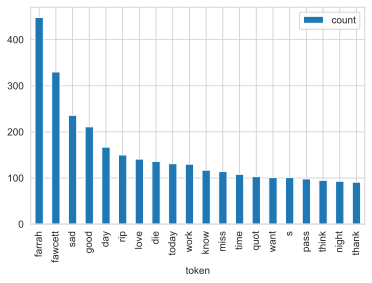

In [42]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

## Word clouds

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

#### The Word Cloud!!

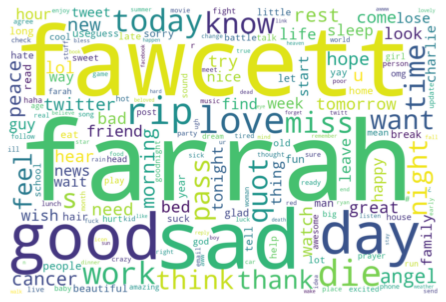

In [45]:
wordcloud(counter)

### Positive words, negative words

Let's do some charts and clouds for exclusively positive or negative samples.

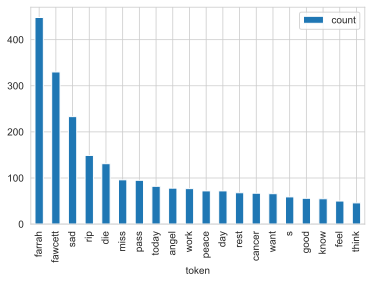

In [46]:
neg_df = df_sm[df_sm['sentiment']==0]
neg_tokens = neg_df.text_nav.map(my_tokenizer).sum()
neg_counter = Counter(neg_tokens)
#neg_counter.most_common(20)
neg_counter = Counter(remove_stopwords(neg_tokens))
neg_freq_df = pd.DataFrame.from_records(neg_counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
neg_freq_df.plot(kind='bar', x='token');

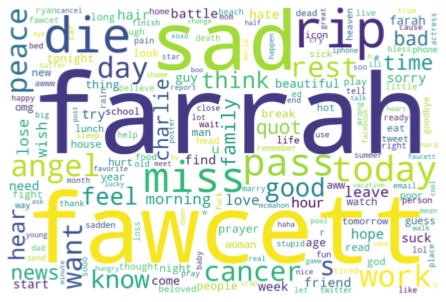

In [47]:
wordcloud(neg_counter)

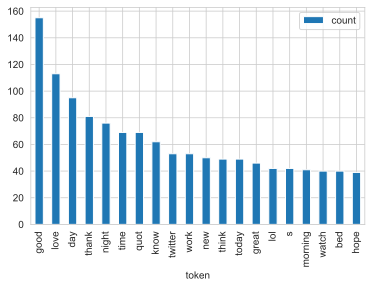

In [48]:
pos_df = df_sm[df_sm['sentiment']==4]
pos_tokens = pos_df.text_nav.map(my_tokenizer).sum()
pos_counter = Counter(pos_tokens)
#pos_counter.most_common(20)
pos_counter = Counter(remove_stopwords(pos_tokens))
pos_freq_df = pd.DataFrame.from_records(pos_counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
pos_freq_df.plot(kind='bar', x='token');

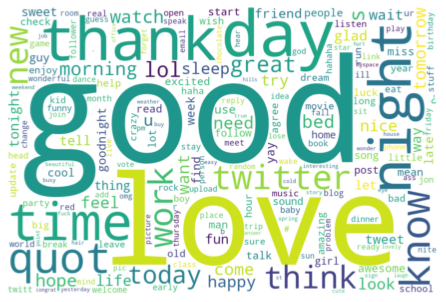

In [49]:
wordcloud(pos_counter)

Well, WOW, those are some mighty positive words, in the positive documents word cloud! 

The most frequently occurring words are clearly different in the text labeled as positive and the text labeled as negative.

In the early phases of development, we were using a dataset, centered around the change at 800,000 rows, with 4000 samples. In this sample, the words "Farrah" and "Fawcett" were the most common words. This suggested perhaps that we need to be more careful about subsampling our data (perhaps a random selection approach would yeild less weird results?) it made for a surprise when we looked at positive and negative sentiment. Who would have thought that "Farrah" and "Fawcett" would be exclusively from statements with negative sentiment? Surprised me, for sure, but there it is. Data Exploration!

## Exploring text complexity

In [50]:
df_sm['no_tokens'] = df_sm.text_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

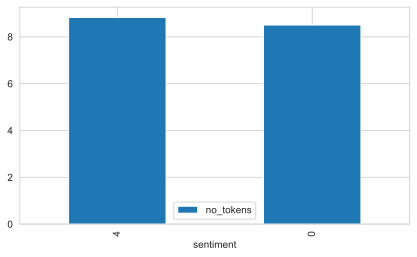

In [51]:
# mean number of tokens by sentiment
df_sm.groupby(['sentiment']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [52]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

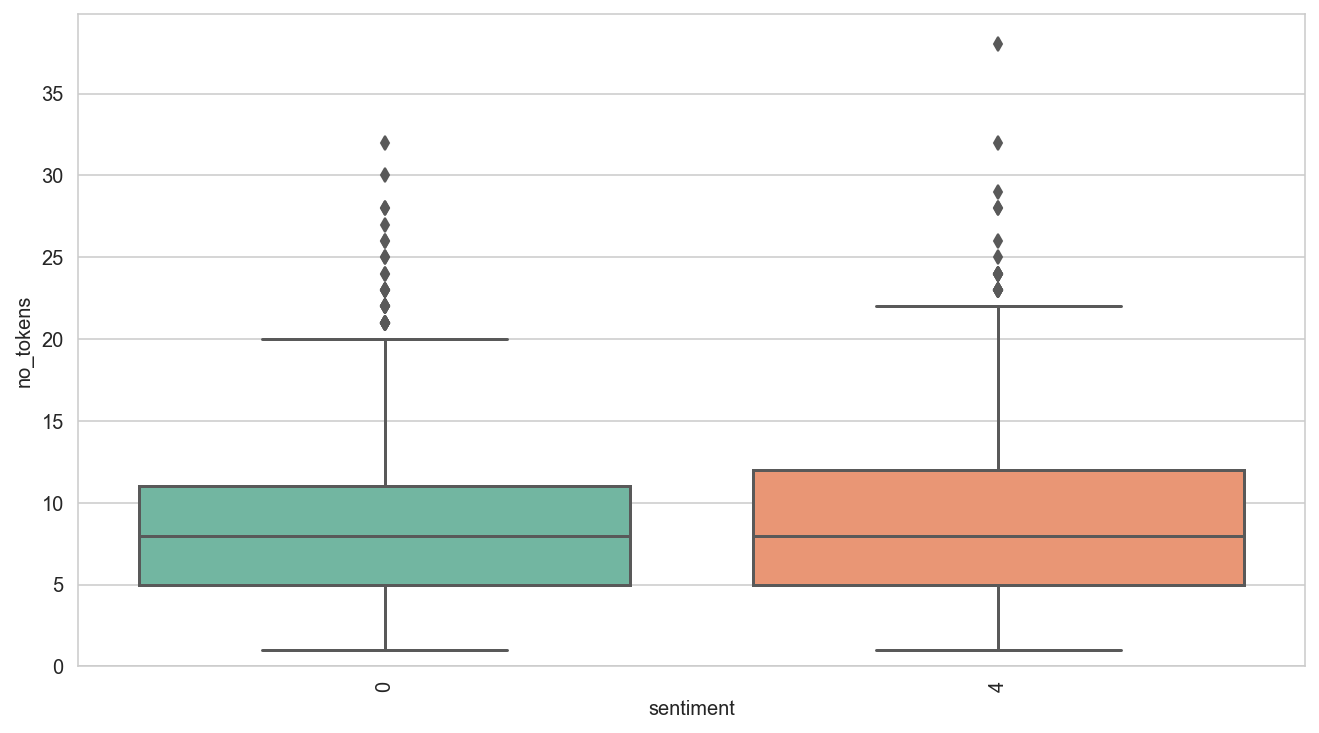

In [53]:
multi_boxplot(df_sm, 'sentiment', 'no_tokens');

In [54]:
# print text of outliers
df_sm['text_lemma'][df_sm.no_tokens > 1500]

Series([], Name: text_lemma, dtype: object)

In [55]:
# cut-off diagram at y=40

# CAREFUL!!! this isn't that meaningful, and it takes for freaking ever to plot, even with only 4000 rows!!!

# multi_boxplot(df_sm, 'username', 'no_tokens', ylim=40)

------------------------------------------

# ===============================
# Feature Engineering
# ===============================

--------------------------------------------

Feature Engineering and Feature Selection are part of the Data Preparation stage of the CRISP-DM methodology. After data has been cleaned and explored, it must be transformed from raw, unstructured text into a structured numeric format that can be used as inputs for our models. Simpler Data Engineering techniques focus on vectorizing individual words, with little emphasis on the contexts of the words. We use Bag of Words and Bag of N-Grams to explore these simpler approaches. While easy to use, and not terribly demanding in terms of computer power required, these techniques are fundamentally less powerful than more modern, processor intensive techniques that concern themselves more with the context of the words. We use pre-trained word embeddings for our advanced feature engineering efforts, in order to avoid computational bottlenecks. If time allows, we may attempt to train our own embedding at some point.

### A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature\attribute.

## Bag of Words Model

The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values. The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(df_sm['text_nav'])
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
# get all unique words in the corpus
vocab_bagowords = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab_bagowords)

,aaaaahhhh,aaaand,aaargh,aaawwww,aargh,aaru,abay,abby,abc,ability,abit,able,absolute,absorb,ac,...,zhen,zippy,zoe,zombie,zone,zoo,zta,½c,½i,½n,½o,½s,½se,½y,½ï
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Micro dataframe visualization experiment

To satisfy my curiosity, I'm going to make up a teeny weeny little dataframe, to see if I can see some values in one of these arrays as it gets previewed here in the pandas dataframe thing. We just see the corners. All zeroes. Let's see if it looks more satisfying with just a handful of rows...

In [58]:
df_micro = df_sm[1:10]
cv_micro = CountVectorizer(min_df=0., max_df=1.)
cv_micro_matrix = cv_micro.fit_transform(df_micro['text_nav'])
cv_micro_matrix = cv_micro_matrix.toarray()
cv_micro_matrix

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0],
    

In [59]:
# get all unique words in the corpus
vocab_micro = cv_micro.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_micro_matrix, columns=vocab_micro)

,angel,be,beloved,competition,cravng,cream,curious,detail,dotclear,enter,farrah,fawcett,get,go,good,...,rip,say,simplicity,site,thank,time,today,try,upload,vibe,want,will,wordpress,work,yup
0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0
5,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


### Oh, that's much more gratifying!

While it's clearly useless from a practical perspective, it's nice to be able to see some numbers that aren't zeroes and let me know that the code is doing the thing I expect the code to be doing. I've got to try this on the next ones, too!

## Bag of N-Grams model

A word is just a single token, often known as a unigram or 1-gram. We already know that the Bag of Words model doesn’t consider order of words. But what if we also wanted to take into account phrases or collection of words which occur in a sequence? N-grams help us achieve that. An N-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence. Bi-grams indicate n-grams of order 2 (two words), Tri-grams indicate n-grams of order 3 (three words), and so on. The Bag of N-Grams model is hence just an extension of the Bag of Words model so we can also leverage N-gram based features. The following example depicts bi-gram based features in each document feature vector.

In [60]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,5))
bv_matrix = bv.fit_transform(df_sm['text_nav'])

bv_matrix = bv_matrix.toarray()
vocab_ngrams = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab_ngrams)

,aaaaahhhh zippy,aaaaahhhh zippy next,aaaaahhhh zippy next do,aaaaahhhh zippy next do stop,aaaand portfolio,aaaand portfolio time,aaaand portfolio time enough,aaaand portfolio time enough make,aaargh cold,aaargh cold fine,aaargh cold fine add,aaargh cold fine add be,aaawwww farrah,aaawwww farrah ri,aaawwww farrah ri die,...,½s poker face itï ½s,½s xd,½s xd day,½s xd day school,½s xd day school today,½se auf,½se auf toast,½se auf toast germandoo,½se auf toast germandoo joy,½y bay,½y bay ½n,½y bay ½n ng,½y bay ½n ng ch,½ï ½ï,½ï ½ï ½ï
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This gives us feature vectors for our documents, where each feature consists of a bi-gram representing a sequence of two words and values represent how many times the bi-gram was present for our documents.

### And now with the Micro Dataframe:

In [61]:
bv_micro = CountVectorizer(ngram_range=(2,2))
bv_micro_matrix = bv_micro.fit_transform(df_micro['text_nav'])

bv_micro_matrix = bv_micro_matrix.toarray()
vocab_micro = bv_micro.get_feature_names()
pd.DataFrame(bv_micro_matrix, columns=vocab_micro)

,angel beloved,be read,beloved rip,competition detail,cravng novel,cream want,curious get,detail site,dotclear wordpress,enter put,farrah fawcett,fawcett angel,get be,good know,ice cream,...,put say,rip pass,simplicity dotclear,site offline,thank vibe,time competition,today ice,try enter,try will,try work,upload try,vibe good,will work,wordpress try,yup nyquil
0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
5,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# TF-IDF Model

There are some potential problems which might arise with the Bag of Words model when it is used on large corpora. Since the feature vectors are based on absolute term frequencies, there might be some terms which occur frequently across all documents and these may tend to overshadow other terms in the feature set. The TF-IDF model tries to combat this issue by using a scaling or normalizing factor in its computation. TF-IDF stands for Term Frequency-Inverse Document Frequency. There are multiple variants of this model but they all end up giving quite similar results.

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(df_sm['text_nav'])
tv_matrix = tv_matrix.toarray()

vocab_tfidf = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab_tfidf)

,aaaaahhhh,aaaand,aaargh,aaawwww,aargh,aaru,abay,abby,abc,ability,abit,able,absolute,absorb,ac,...,zhen,zippy,zoe,zombie,zone,zoo,zta,½c,½i,½n,½o,½s,½se,½y,½ï
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2973,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2974,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2975,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Gotta try that with the Micro Dataframe...

In [63]:
tv_micro = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_micro_matrix = tv_micro.fit_transform(df_micro['text_nav'])
tv_micro_matrix = tv_micro_matrix.toarray()

vocab_micro = tv_micro.get_feature_names()
pd.DataFrame(np.round(tv_micro_matrix, 2), columns=vocab_micro)

,angel,be,beloved,competition,cravng,cream,curious,detail,dotclear,enter,farrah,fawcett,get,go,good,...,rip,say,simplicity,site,thank,time,today,try,upload,vibe,want,will,wordpress,work,yup
0,0.41,0.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.41,0.00,0.00,0.00,...,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.48,0.00,0.00,0.48,0.00,0.41,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.40,0.34,0.00
5,0.00,0.00,0.00,0.34,0.00,0.00,0.00,0.34,0.00,0.34,0.00,0.00,0.00,0.00,0.00,...,0.00,0.34,0.00,0.34,0.00,0.34,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,...,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00
7,0.00,0.33,0.00,0.00,0.33,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.00


--------------------------------------

# ===========================
# Feature Selection
# ===========================

--------------------------------------

Feature Selection is an essential step, which allows us to identify which features are most important to the predictive abilities of our models. Filter methods of Feature Selection involve looking at individual features in isolation, giving them a score by which they can be ranked in terms of their usefulness. We use Univariate Chi-squared statistical tests. Wrapper methods of Feature Selection consider sets of features in combination, which can give deeper insights into which features to select given their interactions and correlations with one another. We use Recursive Feature Elimination and Bagged Decision Trees for this type of feature selection. There are also Embedded Feature Selection techniques, however, these are done in concert with the modeling phase of the project, and if they will be attempted, they will be attempted during the modeling phase of the project.

## Filter Method

### The scikit-learn library provides the SelectKBest class that uses the chi squared (chi^2) statistical test to select the best features

Our Bag of Words vectorization has provided us with over a thousand features. SelectKBest can identify which of these features are most strongly correlated with our sentiment label. We produce a new Bag of Words containing only the features SelectKBest determines are most important.

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# select the 500 features that have the strongest correlation to a class from the
# original thousands of features
selector = SelectKBest(chi2, k=500)
selected_features = \
bow_selected = selector.fit(cv_matrix, df_sm['sentiment']).get_support(indices=True)
selected_features

array([  21,   33,   37,   61,   65,   70,   84,  120,  122,  138,  145,  150,
        152,  153,  160,  183,  197,  201,  225,  252,  253,  255,  257,  273,
        281,  317,  332,  341,  349,  352,  354,  362,  365,  379,  395,  422,
        425,  429,  448,  450,  482,  483,  490,  492,  514,  515,  526,  539,
        551,  558,  578,  588,  611,  612,  625,  638,  641,  664,  681,  685,
        692,  700,  727,  763,  769,  774,  780,  798,  802,  803,  808,  810,
        814,  816,  826,  833,  839,  861,  863,  866,  886,  892,  894,  896,
        910,  911,  916,  928,  937,  949,  958,  971,  981,  982,  989, 1004,
       1018, 1023, 1056, 1080, 1081, 1086, 1092, 1102, 1104, 1121, 1122, 1139,
       1159, 1166, 1176, 1185, 1195, 1210, 1216, 1219, 1220, 1225, 1277, 1308,
       1312, 1327, 1329, 1330, 1360, 1361, 1367, 1374, 1380, 1383, 1385, 1389,
       1390, 1394, 1395, 1404, 1405, 1406, 1414, 1416, 1422, 1423, 1428, 1430,
       1445, 1446, 1479, 1503, 1504, 1509, 1512, 152

## Interpreting the Selected Features

That array of numbers tells us which indecies of the Bag of Words vectorization were deemed most important by SelectKBest. Kind of boring on its own. It would be much more gratifying to see the actual words it has decided are most important.

## View list of words selected by SelectKBest

In [65]:
for x in selected_features:
    print(vocab_bagowords[x], end=' ')

account actress add age agree ahhh airport amazing american angel animal anne anniversary announce answer appreciate arm arrive attend awesome awful aww awww back bad battle beach beautiful bed bedtime beer believe beloved beyonce birthday blog blonde blue boo book boy boyfriend brand brave britney bro brown bubble building bummer busy bye cancel cancer car carradine carter celeb chance chapel charlie check chocolate classy client close cnn college com come comin commercial community company computer condolence congrat cook cookie cool count couple courageous course crap crappy crazy cross cry cure cute dad dance dancing dark day dead death design die diego different direct discover disease do doc donnie drag dream drinking drunk dude dvd early easter easy ed enjoy evening everyday excellent excite excited fade fail fake family fantastic farah farrah fashion fast faucet faucett fawcet fawcett fawcetts feather feature feed feel fella felt fight fighter flag follow follower food football

## Wrapper Method

### Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression(solver='lbfgs', max_iter=10)
rfe = RFE(model, 500)
fit = rfe.fit(cv_matrix, df_sm['sentiment'])
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 500
Selected Features: [False False False ... False False  True]
Feature Ranking: [2659 1351 2657 ... 2731 2240    1]


In [68]:
i=0
for x in fit.support_:
    if x:
        print(vocab_bagowords[i], end=' ')
    i=i+1

aargh account add addict address afraid age agree ahhh air airport album amazing angel anniversary answer app arm arrive artistic attack attend attention awesome awful awsome aww baby back bad bag battle bc beach bed bet big birthday bit blib blog blue bonjour boo bore bored boy boyfriend brain brand break bring britney brown bubble bug building bunny burn busy bye can cancel cancer car care carter cause chair chance channel charlie chat cheap check cheese chicago chocolate clean close college com comin computer condition congrat consider contact continue cook cookie cool count couple course crap cross cry cut cute da dad damn dance de dead deserve die different direct disappoint disney do doctor dog drinking drive driver dude dump dun dvd early easy english enjoy enter evening everyday exam excite excited eye fabulous facebook fact fade fail fake fan farah farrah fawcett feature feel feeling finish first fish fisl flag fly follow follower food football forgot france free fresh friday 

## More Wrapper Methods

## Bagged Decision Trees - ExtraTreesClassifier classifier class

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
# feature extraction
model_bagged = ExtraTreesClassifier(n_estimators=10)
model_bagged.fit(cv_matrix, df_sm['sentiment'])
# np.set_printoptions(threshold=np.inf)
print(model_bagged.feature_importances_)
# np.set_printoptions(threshold=200)

[1.96e-06 8.23e-05 2.27e-05 ... 0.00e+00 2.35e-06 1.98e-06]


In [71]:
i=0
n=0
min_imp = 0.00041
for x in model_bagged.feature_importances_:
    if x>min_imp:
        print(vocab_bagowords[i], end=' ')
        n=n+1
    i=i+1
print(' ')
print(' ')
print('Number of Features with minimum importance ', min_imp, ': ', n)

able account add addict afraid age agree ahhhh air album alex amazing angel apettite arm art audrey awesome awful aww baby back bad bag battle bc be beach beautiful bed begin beloved big bit blaaaaarg blache blog boo bore boy boyfriend break bubba bug burn bus bye call can cancel cancer car care cat cause chance change channel charlie check chicago chickening clip close cold college come comin complete computer condition condolence confuse congrat contact cool could couple course coursework crap credit cross cry cus cut cute da dad dam damn damnnn day dead death decision deserve die do drink drive dumps dunno early easy eat ed email enjoy enough enter excited exist facebook fall family fan farah farrah fault favorite fawcet fawcett fed feel fierce fight figure find first fish fly follow follower food football forgot free friend fry fucking fun fund gah gas get gig girl give glad gmail go god godplease good goodbye goodnight gr grade great gross grow guess guy gym haha hahaha hahahaha h

## Feature Selection on TF-IDF encoded features

### Filter Method - SelectKBest

In [72]:
selector_tfidf = SelectKBest(chi2, k=500)
selected_features_tfidf = \
selector_tfidf.fit(tv_matrix, df_sm['sentiment']).get_support(indices=True)
selected_features_tfidf

array([  21,   33,   37,   47,   61,   65,   67,   70,   84,  120,  122,  131,
        138,  150,  152,  153,  155,  160,  172,  183,  197,  201,  225,  252,
        253,  254,  255,  273,  274,  281,  285,  317,  332,  341,  342,  349,
        352,  354,  358,  362,  365,  372,  379,  395,  408,  422,  424,  425,
        429,  446,  448,  450,  458,  467,  482,  483,  490,  492,  494,  514,
        515,  525,  526,  539,  541,  551,  555,  557,  558,  578,  588,  599,
        611,  612,  625,  638,  641,  649,  664,  681,  692,  700,  711,  727,
        733,  751,  759,  763,  774,  775,  780,  798,  802,  803,  808,  810,
        812,  814,  816,  826,  833,  839,  858,  861,  863,  866,  886,  892,
        894,  896,  910,  911,  928,  933,  937,  948,  949,  958,  971,  982,
        989,  997, 1018, 1023, 1024, 1051, 1054, 1056, 1080, 1081, 1086, 1092,
       1102, 1104, 1107, 1121, 1122, 1134, 1137, 1139, 1140, 1157, 1159, 1161,
       1166, 1176, 1185, 1195, 1200, 1210, 1216, 121

In [73]:
for x in selected_features_tfidf:
    print(vocab_tfidf[x], end=' ')

account actress add adore age agree ahaha ahhh airport amazing american anal angel anne anniversary announce annoying answer apologize appreciate arm arrive attend awesome awful awsome aww back background bad bag battle beach beautiful beauty bed bedtime beer beie believe beloved bestie beyonce birthday blame blog blogspot blonde blue bonjour boo book bore bother boy boyfriend brand brave brb britney bro brother brown bubble buddy building bulletin bummed bummer busy bye cali cancel cancer car carradine carter cat celeb chance charlie check chicago chocolate chris cinema clarkson classy close clothe cnn college com come comin commercial common community company computer condolence congrat conversation cook cookie cool count couple courageous course crap crappy cross cruise cry cupcakes cure cute dad dancing dark date dead death debby depressed deserve design die diego different direct discover disease disney do doc dollar donfucious donnie don½t dr drag drama dream drinking drunk dude 

## RFE on TF-IDF vectors 

In [74]:
model_tfidf = LogisticRegression(solver='lbfgs', max_iter=10)
rfe = RFE(model_tfidf, 500)
fit_tfidf = rfe.fit(tv_matrix, df_sm['sentiment'])
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 500
Selected Features: [False False False ... False False  True]
Feature Ranking: [2659 1351 2657 ... 2731 2240    1]


In [75]:
i=0
for x in fit_tfidf.support_:
    if x:
        print(vocab_bagowords[i], end=' ')
    i=i+1

able account add address afraid age agree ahhh airport album amazing american angel anne anniversary answer appreciate arm arrive art attention awesome awful awsome aww back background bad bag battle bc be beach bed believe big birthday bit blog blue bonjour boo book bore bout boy boyfriend brand brb break bro brown bubble bug building burn busy bye can cancel cancer car care carter cat cause cel chance charlie check chicago chickening chocolate cinema clean close college com comin commercial common complete computer condition condolence congrat contact cook cookie cool could count couple course crap crappy crazy cross cry cupcakes cus cut cute dad dam damn dance de dead death depressed deserve die different direct disney do doctor dog dollar drink drinking dude dumps dvd early easter easy ed english enjoy enter everyday excite excited fact fail fake family farah farrah fast favorite fawcet fawcett feather feature feel fella fight finish flag fly follow follower food football forgot fr

# Selecting TF-IDF Features with Bagged Decision Trees

### This represents our most sophisticated feature selection method, being used with our most sophisticated feature engineering method.

Earlier, in the Feature Engineering section, we vectorized our text data using the Term Frequency - Inverse Document Frequency method. This resulted in our documents being represented as vectors with thousands of dimensions. Here we will select the most statistically relevant dimensions using a Wrapper Method known as an Extra Trees Classifier, which is an example of Bagged Decision Trees. 

In [76]:
model_bagged_tfidf = ExtraTreesClassifier(n_estimators=20)
model_bagged_tfidf.fit(tv_matrix, df_sm['sentiment'])
# np.set_printoptions(threshold=np.inf)
print(model_bagged_tfidf.feature_importances_)
# np.set_printoptions(threshold=200)

[8.81e-07 1.14e-04 0.00e+00 ... 0.00e+00 0.00e+00 2.06e-06]


In [77]:
i=0
n=0
min_imp = 0.00040
for x in model_bagged_tfidf.feature_importances_:
    if x>min_imp:
        print(vocab_tfidf[i], end=' ')
        n=n+1
    i=i+1
print(' ')
print(' ')
print('Number of Features with minimum importance ', min_imp, ': ', n)

able actress add addict afraid age agree ahhhh airport alex amazing andrewcilley angel apettite arm art awesome awful aww baby back bad battle bc be beach beautiful bed believe beloved big bit blaaaaarg blache blackberrys blog boo book bore bowls boy boyfriend break brussels bubba bug bunny burn butterfly bye call can cancel cancer car care cause celery chance change charlie check chicago chickening chill chocolate class clip close cold college come comin complete computer concentrate condition condolence confuse congrat contact cooking cool could couple course court crap credit crutch cry cus cut cute dad dam damn darn day daylol de dead death die do doctor dollar dream drink dumps dunno early eat ed end endless english enjoy enough enter everything eveytime excited face fall family fan farah farrah faucett favorite fawcet fawcett feather feel fell fella fellow fierce fight figure find first follow fomo food football forgot friday friend fritz fry fuck fucking fun fund funny gas get g

# A record and summary of 6 types of Feature Selection

## Because I WILL be dropping RFE for being too intensive.

### Running with 3000 samples gave us vectors with around 5000 dimensions. After much running time, we were able to visually inspect the 500 most important features, as selected by each method. It is perhaps not informative to look at, and compare, these lists of features - but it is fun. And it may give some "subconscious" intuition into that age-old question, "What are these things thinking?" So, before I disable some of these, so I can run bigger datasets through all this code, here's a record of this activity, in the comments/markdown.

I will, quite simple, strip the top two and bottom two rows of each output, and paste them here with clear labels. Pretty sure I won't be running RFE going forward - spins forever, with a pretty low number of samples.

#### SelectKBest with Bag of Words
account actress add age agree ahhh airport amazing american angel animal anne anniversary announce answer appreciate arm arrive attend awesome awful aww awww back bad battle beach beautiful bed bedtime beer believe beloved beyonce birthday blog blonde blue boo book boy boyfriend brand brave britney bro ... tomorrow tongue toooo tragic trust tt tuesday tweet twilight twin twit twitter ugh ughhh unc unfair update updates upgrade upload upset ur use vacuum vegas version voice vote wait walters want warped wat watch way wayne website welcome window wish woke woman wonderful woop work wrist wrong wtf xd xoxo yay young youth yup
#### RFE with Bag of Words
aargh account add addict address afraid age agree ahhh air airport album amazing angel anniversary answer app arm arrive artistic attack attend attention awesome awful awsome aww baby back bad bag battle bc beach bed bet big birthday bit blib blog blue bonjour boo bore bored boy boyfriend brain brand break ... tragic true trust tuesday tv tweeting twin twit twitter ugh unc understand unfair updates upgrade upload upset vacation vegas version vibe video vote wait walmart wanna want wat watch way wayne welcome whole whyyyy wife win wish woke wonder wonderful woop word work working world write wrong wtf xavier xd yay young yup
#### Extra Trees Forest with Bag of Words
able account add addict afraid age agree ahhhh air album alex amazing angel apettite arm art audrey awesome awful aww baby back bad bag battle bc be beach beautiful bed begin beloved big bit blaaaaarg blache blog boo bore boy boyfriend break bubba bug burn bus bye call can cancel cancer car care cat cause ... twitter ugh ughh uncle unfair unusual upgrade upgradeable upload upset upsetting ur use vacation vibe vote wait wake walk wanna want warm warning watch way weather wee week weekend welcome well wholee will wish wishing woke woman wonderful work working world would wrong xoxo yay yeanot year yesterday young yup zoo
#### SelectKBest with TF-IDF
account actress add adore age agree ahaha ahhh airport amazing american anal angel anne anniversary announce annoying answer apologize appreciate arm arrive attend awesome awful awsome aww back background bad bag battle beach beautiful beauty bed bedtime beer beie believe beloved bestie beyonce birthday ... touchy tragic trust tuesday tweetie twilight twin twit twitt twitter ugh ughhh unc uncle understand unfair updates upload upset upsetting use va vegas version view voice vote wait wallpaper want watch way website welcome westney window wish woke woman wonderful woo work wrong xd xoxo yay yayyy young youth yup zoo 
#### RFE with TF-IDF
able account add address afraid age agree ahhh airport album amazing american angel anne anniversary answer appreciate arm arrive art attention awesome awful awsome aww back background bad bag battle bc be beach bed believe big birthday bit blog blue bonjour boo book bore bout boy boyfriend brand brb break bro ... upsetting va vacation vegas version vibe vote wait walk wanna want watch way wee welcome whole window wish wishing woke wonder wonderful word work working world wrong wtf xoxo yay young yud yup zoo
#### Extra Trees Forest with TF-IDF
able actress add addict afraid age agree ahhhh airport alex amazing andrewcilley angel apettite arm art awesome awful aww baby back bad battle bc be beach beautiful bed believe beloved big bit blaaaaarg blache blackberrys blog boo book bore bowls boy boyfriend break brussels bubba bug bunny burn butterfly ... upgrade upgradeable upload upset upsetting ur use vacation vegas vibe video wait wake walk walmart wanna want warm warning watch way weather wee week weekend welcome well whole wholee will window wish wishing woke woman wonderful word work working world worried would wrong xoxo yay yeanot year yesterday young yud yup yuri zoo  



## Last but (maybe) not least - Selecting with our Bag-of-N-Grams

#### Comparing features for Bag-o-words and TF-IDF was very much like comparing apples with apples.

This is going to look a little different, I'll bet, so I'll keep it out from between those two.

In [78]:
# select the 50 features that have the strongest correlation to a class from the
# original thousands of features
selector_ngrams = SelectKBest(chi2, k=500)
selected_features_ngrams = \
ngrams_selected = selector_ngrams.fit(bv_matrix, df_sm['sentiment']).get_support(indices=True)
selected_features_ngrams

array([  136,   142,   292,   663,   673,   674,   675,   708,   709,   736,
         776,   777,   778,   791,  1427,  1490,  1494,  1724,  1787,  1962,
        2001,  2126,  2136,  2155,  2175,  2303,  2313,  2415,  2544,  2696,
        2699,  2711,  2712,  3635,  4269,  4273,  4276,  4279,  4319,  4327,
        4359,  4406,  4456,  4496,  5006,  5020,  5021,  5044,  5045,  5046,
        5050,  6249,  6316,  7252,  7290,  7783,  7793,  7806,  8706,  8724,
        8728,  9670,  9680,  9721,  9834,  9944,  9960,  9978,  9994,  9998,
       10006, 10007, 10008, 10022, 10023, 10049, 10052, 10065, 10081, 10082,
       10099, 10114, 10115, 10158, 10173, 10175, 10178, 10201, 10252, 10260,
       10263, 10272, 10293, 10295, 10331, 10336, 10343, 10349, 10357, 10360,
       10368, 10370, 10394, 10397, 10398, 10399, 10416, 10435, 10449, 10472,
       10635, 10641, 10650, 10843, 10854, 10866, 10867, 10868, 10869, 10890,
       10891, 10931, 10935, 10956, 10976, 10977, 11004, 11013, 11031, 11032,

In [79]:
for x in selected_features_ngrams:
    print(vocab_ngrams[x], end=' - || - ')

actress farrah - || - actress farrah fawcett - || - age sad - || - angel angel - || - angel beloved - || - angel beloved rip - || - angel beloved rip pass - || - angel farrah - || - angel farrah fawcett - || - angel heaven - || - angel quot - || - angel quot cancer - || - angel quot cancer die - || - angel sad - || - aww farrah - || - awww farrah - || - awww farrah fawcett - || - bad feel - || - bad want - || - battle cancer - || - battle cancer sad - || - be come - || - be die - || - be get - || - be hear - || - be use - || - be watch - || - beautiful rip - || - bed night - || - believe die - || - believe pass - || - beloved rip - || - beloved rip pass - || - break die - || - can believe - || - can believe die - || - can believe pass - || - can go - || - can wait - || - can wait see - || - cancer age - || - cancer die - || - cancer life - || - cancer sad - || - charlie angel - || - charlie angel farrah - || - charlie angel farrah fawcett - || - charlie angel quot - || - charlie angel 

rest peace farrah fawcett - || - rest peace ms - || - rest peace ms farrah - || - rest peace ms farrah fawcett - || - right good - || - rip angel - || - rip farah - || - rip farah fawcett - || - rip farrah - || - rip get - || - rip go - || - rip hear - || - rip jill - || - rip know - || - rip lose - || - rip miss - || - rip pass - || - rip pray - || - rip remember - || - rip sad - || - rip see - || - rip take - || - rip will - || - rip will miss - || - role model - || - ryan neal - || - ryan oneal - || - sad be - || - sad can - || - sad can believe - || - sad die - || - sad farah - || - sad farah fawcett - || - sad farrah - || - sad farrah fawcett - || - sad farrah fawcett hear - || - sad farrah fawcett hear pass - || - sad feel - || - sad feel die - || - sad fight - || - sad find - || - sad go - || - sad hear - || - sad know - || - sad lose - || - sad omg - || - sad pass - || - sad passed - || - sad rest - || - sad rip - || - sad sad - || - sad see - || - sad theresa - || - sad young 

Well, that was weird...

What were you doing when you heard Elvis was dead?

Pulling into a McDonald's parking lot with my Dad.

John Lennon?

Calling a friend about a BASIC programming quesiton.

Farrah Fawcett?

Reading a list of N-Grams from a huge Twitter dataset that had been chosen by SelectKBest. 

Guess I missed that, 10 years ago. 

# RFE with Bag of N-Grams?

## Sorry, no.

## RFE takes a fabulously long time, even with a few thousand dimensions.

My bag-o-n-grams has 2-grams, 3-grams, and 4-grams. It's kinda fun. With 2000 samples, it has TENS of THOUSANDS of dimensions. I think RFE, in general, won't play a big role in my plans. I suppose I could run this on a few hundred samples to see if it works. But so what if it does? Can't move ahead with any constructive with dinky little dataframes like that. 

# Let's do the forest with the ngrams and call it a day.

In [80]:
model_bagged_ngrams = ExtraTreesClassifier(n_estimators=20)
model_bagged_ngrams.fit(bv_matrix, df_sm['sentiment'])
# np.set_printoptions(threshold=np.inf)
print(model_bagged_ngrams.feature_importances_)
# np.set_printoptions(threshold=200)

[1.35e-06 4.39e-06 8.50e-06 ... 5.83e-07 0.00e+00 0.00e+00]


In [81]:
i=0
n=0
min_imp = 0.0004
for x in model_bagged_ngrams.feature_importances_:
    if x>min_imp:
        print(vocab_ngrams[i], end=' - || - ')
        n=n+1
    i=i+1
print(' ')
print(' ')
print('Number of Features with minimum importance ', min_imp, ': ', n)

addx today - || - ahhhh fall - || - angel farrah - || - angel heaven - || - angel sad - || - apettite much - || - awful little - || - aww close - || - aww farrah - || - aww sad - || - awww sad - || - awwwww sad - || - bad feel - || - bad want - || - barbara walters - || - battle cancer - || - battle feel fight - || - bbq special - || - be bore - || - be can - || - be loner - || - be miss - || - be watch - || - beach day - || - beautiful rip - || - beautiful young - || - bed night - || - bit long - || - blackberrys fritz - || - boyfriend miss - || - brush guy - || - bubba butterfly - || - can believe - || - can go - || - can wait - || - cancer die - || - cancer life - || - cancer suck rip - || - car break - || - car overheated - || - cat miss - || - charlie angel - || - charlie angels trio - || - chickening be - || - comin summer - || - comp die - || - condolence farrah send - || - condolence send - || - could go - || - couple day - || - couple hour - || - coursework concentrate - || - 

# Milestone 1 - Conclusion

### Data has been loaded, cleaned, and explored.

### Feature Engineering has been carried out using Bag of Words, Bag of N-Grams, and TF-IDF (Term Frequency - Inverse Document Frequency)

### Three Feature Selection methods, Select K Best, Recursive Feature Elimination, and Bagged Decision Trees, have been carried out on the engineered features.

### A sample of cleaned data has been saved to a file, for use in an "Advanced" part of this project using Tensorflow and ELMo in The Cloud.

Dec 14 2019

---------------------

-----------------------

-----------------------

----------------------

----------------------

---------------------
#
#
#
### End of working working file.
#
#
#

## Sentiment Analysis with Afinn

As a quick and dirty sanity check, I've set up Afinn in the early stages of data cleaning, and intend to keep a little record of Afinn's performance, as I increase the rigour of the data cleaning.

In [82]:
from afinn import Afinn

afn = Afinn(emoticons=True)

In [83]:
texts = np.array(df_sm['text_nav'])
sentiments = np.array(df_sm['sentiment'])

# extract data for model evaluation
#train_texts = texts[:10000]
#train_sentiments = sentiments[:10000]

#test_texts = texts[40000:60000]
#test_sentiments = sentiments[40000:60000]
sample_ids = [626, 533, 310, 123, 654, 400]

In [84]:
#for text_clean, sentiment in zip(texts[sample_ids], sentiments[sample_ids]):
#    print('TEXT:', texts)
#    print('Actual Sentiment:', sentiment)
#    print('Predicted Sentiment polarity:', afn.score(texts))
#    print('-'*60)

In [85]:
# Predict sentiment with Afinn

sentiment_polarity = [afn.score(Text) for Text in normalized_texts]
#predicted_sentiments = ['positive' if score >= 1.0 else 'negative' for score in sentiment_polarity]
predicted_sentiments = [4 if score >= 1.0 else 0 for score in sentiment_polarity]

NameError: name 'normalized_texts' is not defined

In [ ]:
#meu.display_model_performance_metrics(true_labels=test_texts, predicted_labels=predicted_sentiments, 
#                                  classes=['positive', 'negative'])
#meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments, 
                                  classes=[4, 0])

## Checking cleaning with Afinn

I'm curious about how deeper cleaning affects predicitive models. So I set up Afinn after the very first round of data cleaning, and am going to track results here in the markdown. For simplicity, I will monitor the effects of different levels of cleaning on "weighted avg f1-score"

Round 1, most basic cleaning, 20000 rows:  0.63

Round 2, include normalization, 20000 rows: 0.63

In [ ]:
df_sm.head()

## Save to database

In [ ]:
df.to_sql('df_sm', con)